In [1]:
#pip install scikit-learn --upgrade

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
from sklearn import set_config
set_config(transform_output="pandas")

# Exploring 1000 song dataset

In [4]:
df_1000 = pd.read_csv(r'df_audio_features_1000.csv')

In [5]:
df_1000 ['title'] = df_1000['name'] + ' - ' + df_1000['artist']

In [6]:
df_1000.set_index('title', inplace=True)

In [7]:
df_1000.drop(['type','id','html','name','artist'],axis=1, inplace=True)

In [8]:
df_1000

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
title,,,,,,,,,,,,,
All Shook Up - Elvis Presley,0.6240,0.46800,10,-12.162,1,0.1320,0.881,0.000006,0.1440,0.9520,74.139,117080,4
I've Got You Under My Skin - Remastered 1998 - Frank Sinatra,0.5850,0.24700,1,-12.612,1,0.0400,0.452,0.000009,0.1070,0.5910,127.150,223760,4
Smoke Gets In Your Eyes - The Platters,0.2900,0.22700,3,-13.060,1,0.0311,0.944,0.000079,0.6170,0.2240,114.278,157293,4
"What'd I Say, Pt. 1 & 2 - Ray Charles",0.5400,0.68100,4,-5.440,1,0.0508,0.808,0.000000,0.1620,0.7940,88.385,307053,4
Dream A Little Dream Of Me - Ella Fitzgerald,0.4550,0.16700,0,-13.613,1,0.0739,0.918,0.000000,0.1730,0.4040,76.118,185067,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49 - Pyotr Ilyich Tchaikovsky",0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,995000,4
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique - Tristan Murail",0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,855000,4
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours) - Arnold Schoenberg",0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,238187,3


In [9]:
df1000songs=df_1000.copy()
df1000songs

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
title,,,,,,,,,,,,,
All Shook Up - Elvis Presley,0.6240,0.46800,10,-12.162,1,0.1320,0.881,0.000006,0.1440,0.9520,74.139,117080,4
I've Got You Under My Skin - Remastered 1998 - Frank Sinatra,0.5850,0.24700,1,-12.612,1,0.0400,0.452,0.000009,0.1070,0.5910,127.150,223760,4
Smoke Gets In Your Eyes - The Platters,0.2900,0.22700,3,-13.060,1,0.0311,0.944,0.000079,0.6170,0.2240,114.278,157293,4
"What'd I Say, Pt. 1 & 2 - Ray Charles",0.5400,0.68100,4,-5.440,1,0.0508,0.808,0.000000,0.1620,0.7940,88.385,307053,4
Dream A Little Dream Of Me - Ella Fitzgerald,0.4550,0.16700,0,-13.613,1,0.0739,0.918,0.000000,0.1730,0.4040,76.118,185067,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49 - Pyotr Ilyich Tchaikovsky",0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,995000,4
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique - Tristan Murail",0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,855000,4
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours) - Arnold Schoenberg",0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,238187,3


# Scale data
I would suggest 5 n_clusters for 1000 songs here, since our "bosses" tell us to have like 200-250 songs per cluster.  
With the larger dataset we can work with 250 songs. Read LMS 6.5 and 6.6 for deeper understanding.  

In [10]:
# To get used to the "raw numbers":
df1000songs.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1.440000e+03,1440.000000
mean,0.538917,0.494241,5.154861,-11.098032,0.663194,0.086273,0.469774,0.188482,0.174391,0.472576,115.249066,2.912083e+05,3.889583
std,0.219193,0.281917,3.540932,6.979107,0.472782,0.086193,0.374637,0.336594,0.146007,0.287807,31.611805,2.280920e+05,0.446937
min,0.059600,0.000020,0.000000,-44.406000,0.000000,0.023200,0.000002,0.000000,0.020700,0.019600,49.689000,6.275800e+04,1.000000
25%,0.386000,0.243000,2.000000,-14.927250,0.000000,0.038400,0.083025,0.000000,0.090700,0.214750,91.014250,1.930300e+05,4.000000
50%,0.562000,0.529500,5.000000,-8.939500,1.000000,0.048200,0.419000,0.000127,0.118000,0.476500,110.008000,2.336965e+05,4.000000
75%,0.710250,0.733000,8.000000,-5.677250,1.000000,0.088825,0.869250,0.159750,0.203000,0.720000,135.587000,3.080625e+05,4.000000
max,0.964000,0.996000,11.000000,1.085000,1.000000,0.576000,0.996000,0.985000,0.985000,0.985000,206.313000,3.815787e+06,5.000000


In [11]:
from sklearn.preprocessing import MinMaxScaler

my_scaler = MinMaxScaler()

scaled_df = my_scaler.fit_transform(df1000songs)

In [12]:
scaled_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
title,,,,,,,,,,,,,
All Shook Up - Elvis Presley,0.624060,0.469869,0.909091,0.708800,1.0,0.196816,0.884538,0.000006,0.127865,0.965817,0.156106,0.014474,0.75
I've Got You Under My Skin - Remastered 1998 - Frank Sinatra,0.580938,0.247977,0.090909,0.698907,1.0,0.030391,0.453814,0.000009,0.089495,0.591879,0.494567,0.042899,0.75
Smoke Gets In Your Eyes - The Platters,0.254755,0.227896,0.272727,0.689059,1.0,0.014291,0.947791,0.000081,0.618376,0.211726,0.412383,0.025189,0.75
"What'd I Say, Pt. 1 & 2 - Ray Charles",0.531181,0.683728,0.363636,0.856565,1.0,0.049928,0.811245,0.000000,0.146531,0.802155,0.247063,0.065093,0.75
Dream A Little Dream Of Me - Ella Fitzgerald,0.437196,0.167654,0.000000,0.676903,1.0,0.091715,0.921687,0.000000,0.157938,0.398177,0.168742,0.032589,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49 - Pyotr Ilyich Tchaikovsky",0.157452,0.069660,0.272727,0.461981,1.0,0.043596,0.920683,0.725888,0.064814,0.047545,0.244005,0.248397,0.75
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique - Tristan Murail",0.141973,0.101387,0.545455,0.495329,1.0,0.037988,0.858433,0.432487,0.050503,0.016470,0.213537,0.211094,0.75
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours) - Arnold Schoenberg",0.000000,0.000913,0.818182,0.031808,1.0,0.036541,0.954819,0.983756,0.058592,0.015330,0.139723,0.046743,0.50


# Cluster creation

In [13]:
from sklearn.cluster import KMeans

my_model = KMeans(n_clusters=5, random_state=123)

my_model.fit(scaled_df)

c:\Users\AlexD\Desktop\Python\Python 3.10.6\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=123)

# Adding column clusters

In [14]:
scaled_df_without_clusters = scaled_df.copy()

In [15]:
scaled_df['cluster']  = my_model.labels_

In [16]:
scaled_df.sample(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
title,,,,,,,,,,,,,,
Síguelo Bailando - Ozuna,0.879478,0.666660,0.818182,0.819854,0.0,0.067836,0.165661,0.000040,0.075703,0.628133,0.308548,0.043709,0.75,0
Andromeda - Applefish,0.170721,0.158617,0.727273,0.554967,1.0,0.035999,0.952811,0.939086,0.094680,0.017506,0.138848,0.051223,0.75,1
In Your Own Sweet Way - Phil Woods,0.622954,0.346372,0.727273,0.780704,1.0,0.027858,0.612449,0.070051,0.080473,0.269733,0.488757,0.112269,0.75,2
Hustlin' - Rick Ross,0.489164,0.654611,0.818182,0.817348,1.0,0.500724,0.085239,0.000000,0.048533,0.651958,0.551327,0.050981,0.75,3
Love & Marriage - Frank Sinatra,0.697037,0.244965,0.909091,0.756084,1.0,0.023878,0.922691,0.000000,0.204604,0.599130,0.391307,0.024777,0.75,2


# Exploring the mean of data

In [17]:
clustered_centroids = scaled_df.groupby('cluster').mean()
clustered_centroids

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
cluster,,,,,,,,,,,,,
0,0.658830,0.677650,0.530207,0.826083,0.0,0.163671,0.211961,0.046861,0.150856,0.585905,0.469530,0.049382,0.740506
1,0.220422,0.145606,0.422559,0.502490,1.0,0.034857,0.913196,0.823939,0.143628,0.120263,0.348581,0.122922,0.680556
2,0.436346,0.296585,0.457989,0.678075,1.0,0.049513,0.810773,0.044173,0.163403,0.390746,0.375611,0.049826,0.698864
3,0.657095,0.694304,0.441485,0.824123,1.0,0.164660,0.190900,0.041875,0.173824,0.629097,0.454790,0.045675,0.741021
4,0.334194,0.184848,0.499193,0.573566,0.0,0.039983,0.883088,0.552942,0.138929,0.207606,0.344214,0.087691,0.707101


# Comparing clusters

<AxesSubplot: >

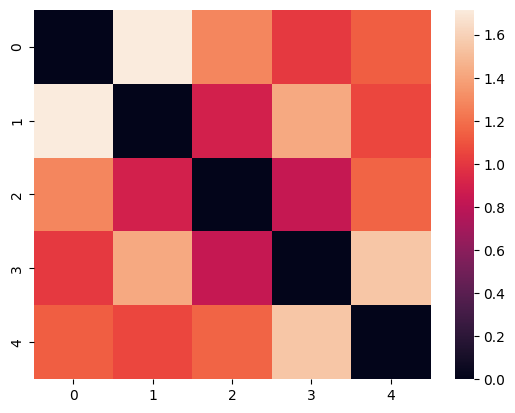

In [18]:
from sklearn.metrics import pairwise_distances

distances_centroids = pairwise_distances(my_model.cluster_centers_)
sns.heatmap(distances_centroids)

# Making radar plot

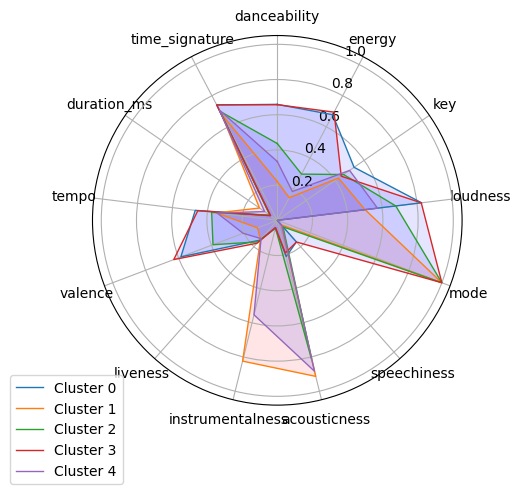

In [19]:
from math import pi
radar_df = clustered_centroids.reset_index().rename(columns={'index':'cluster'})

# ------- PART 1: Create background
 
# number of variable
categories= radar_df.columns.tolist()[1:]
# list(df)[1:]
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable

# Ind1
values=radar_df.loc[0].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 0")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind2
values=radar_df.loc[1].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 1")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=radar_df.loc[2].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 2")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind4
values=radar_df.loc[3].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 3")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind3
values=radar_df.loc[4].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 4")
ax.fill(angles, values, 'b', alpha=0.1)

# # Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))


# Show the graph
plt.show()

# Calculating inertia

A for loop to compute the clustering for each value and append the inertia into a list should do the trick. We will use the range() function to generate a list of values between 1 and 30, and input this value to the n_clusters in each iteration:

In [20]:
max_clusters = 30

inertia_list = []

for i in range(1,max_clusters):
  model_loop = KMeans(n_clusters=i,n_init=10,random_state=123)
  model_loop.fit(scaled_df_without_clusters)
  inertia_list.append(round(model_loop.inertia_,3))

In [21]:
print(inertia_list)

[1353.846, 960.07, 735.174, 633.362, 566.943, 519.406, 481.797, 458.58, 438.693, 418.868, 404.094, 392.168, 383.886, 368.253, 360.237, 353.117, 345.547, 334.796, 328.972, 321.239, 316.348, 307.447, 304.348, 301.811, 295.518, 291.219, 288.661, 285.479, 281.979]


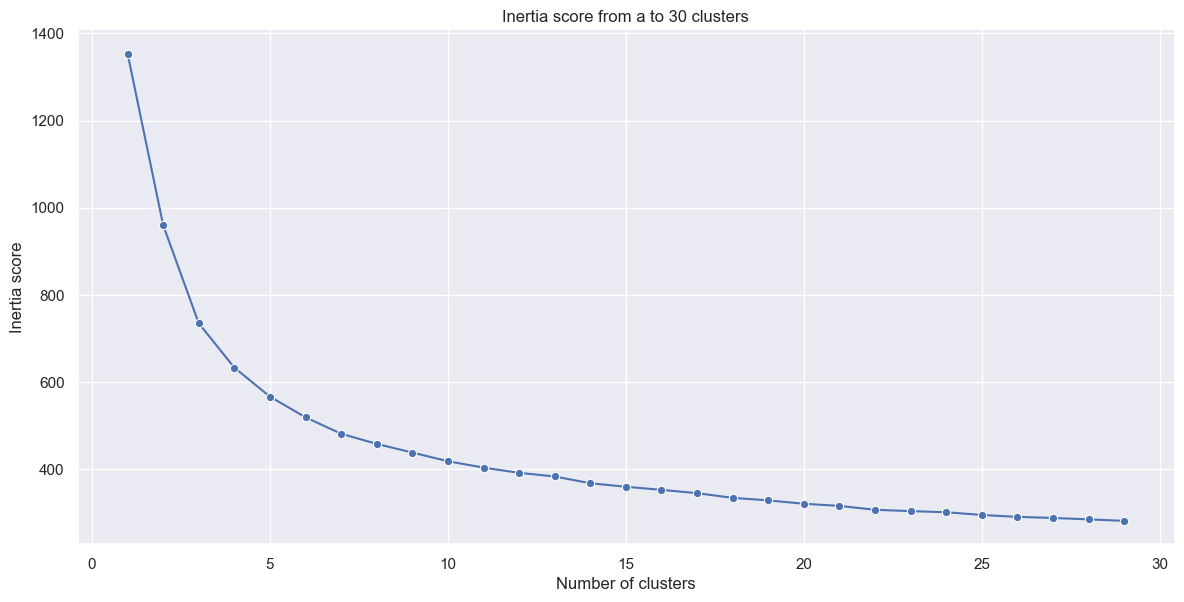

In [22]:
sns.set_theme(style='darkgrid')
(sns.relplot(kind='line',x=range(1,max_clusters),y=inertia_list,marker='o',height=6,aspect=2)
    .set(title=f"Inertia score from a to {max_clusters} clusters")
    .set_axis_labels("Number of clusters", "Inertia score")
);

In this line plot, with the number of clusters (k) represented in the x axis and the inertia represented in the y axis, we are looking for an elbow, as in the moment where the decline stops being sharp to become smooth and gradual:

One might argue that the elbow happens at k=4 or at k=5. It is a pity, since we are looking for a good value between 6 and 30. 

# Silhouette score

To compute the silhouette score, you can use Scikit-Learn’s silhouette_score() function, giving it all the instances in the dataset, and the labels they were assigned:

In [23]:
silhouette_score(scaled_df_without_clusters,my_model.labels_)

0.2768673225897011

In [24]:
max_clusters = 29

silhouette_list = []

for i in range(2,max_clusters):
  model_loop = KMeans(n_clusters=i,n_init=10,random_state=123)
  model_loop.fit(scaled_df_without_clusters)
  score = silhouette_score(scaled_df_without_clusters,model_loop.labels_)
  silhouette_list.append(round(score,2))

If you were able to plot the inertia values for all values of K from 1 to 30, you should be able to do the same for the silhouette coefficients. Here, you will not be looking for elbows, but for local maxima.

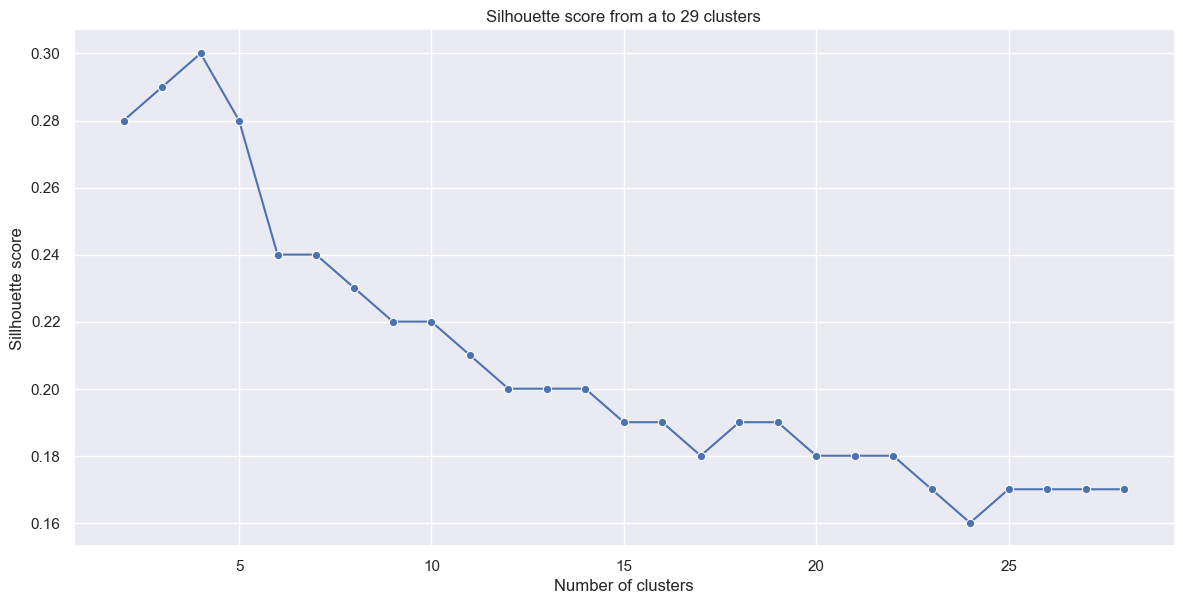

In [25]:
sns.set_theme(style='darkgrid')
(sns.relplot(kind='line',x=range(2,max_clusters),y=silhouette_list,marker='o',height=6,aspect=2)
    .set(title=f"Silhouette score from a to {max_clusters} clusters")
    .set_axis_labels("Number of clusters", "Sillhouette score")
);